In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
! pip install seaborn==0.9.0

In [3]:
things to do


V1) split dataset to train and fit 
   https://stackoverflow.com/questions/56308116/should-feature-selection-be-done-before-train-test-split-or-after

2) outliers?!!!
https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

        
4) variable importtance to choose????
   https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/

5) model

6)model evaluation

SyntaxError: invalid syntax (<ipython-input-3-d8a86dae11e4>, line 1)

In [52]:
# labrary imports
import glob
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display_html
from itertools import chain,cycle
from sklearn.model_selection import train_test_split,learning_curve
from sklearn.feature_selection import mutual_info_classif, SelectKBest, chi2

%matplotlib inline

from datetime import date,timedelta
import time
from scipy import stats
today = date.today().strftime("%d/%m/%Y")

# show all columns
pd.set_option("display.max_columns", None)

# deactivate scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [5]:
params = {'z_score_threshold':3}

# read dataset

In [6]:
t0= time.time()
list_of_files = glob.glob('datasetFraud*.csv') # * means all if need specific format then *.csv
latest_file = max(list_of_files, key=os.path.getctime)
print("file that will be used for this run is: {}".format(latest_file))
print("reading file...")
data = pd.read_csv(latest_file)
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
print("filling N/A...")
data.fillna(0,inplace=True)
display(data.head())
print("date: {}   runtime: {}".format(today,str(timedelta(seconds=(time.time()-t0)))))

file that will be used for this run is: datasetFraud_variables_20220118.csv
reading file...
filling N/A...


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,ext_org_ind,ext_den_ind,Error_oldbalanceOrg,Error_newbalanceOrig,Error_org_fnlBlnce,diff_org_fnl_balance,Error_oldbalanceDest,Error_newbalanceDest,Error_dest_fnlBlnce,diff_dest_fnl_balance,origEntity_trxCnt_origPos,origEntity_trxCnt_destPos,origEntity_trxCnt,destEntity_trxCnt_destPos,destEntity_trxCnt_origPos,destEntity_trxCnt
0,1,PAYMENT,9839.640,C1231006815,170136.000,160296.360,M1979787155,0.000,0.000,0.000,0.000,C,M,170136.000,160296.360,160296.360,0.000,-1.000,-1.000,-1.000,-1.000,1,0.000,1,1,0.000,1
1,1,PAYMENT,1864.280,C1666544295,21249.000,19384.720,M2044282225,0.000,0.000,0.000,0.000,C,M,21249.000,19384.720,19384.720,0.000,-1.000,-1.000,-1.000,-1.000,1,0.000,1,1,0.000,1
2,1,TRANSFER,181.000,C1305486145,181.000,0.000,C553264065,0.000,0.000,1.000,0.000,C,C,181.000,0.000,0.000,0.000,-1.000,-1.000,-1.000,-1.000,1,0.000,1,39,0.000,39
3,1,CASH_OUT,181.000,C840083671,181.000,0.000,C38997010,21182.000,0.000,1.000,0.000,C,C,181.000,0.000,0.000,0.000,21182.000,0.000,21363.000,21363.000,1,0.000,1,38,0.000,38
4,1,PAYMENT,11668.140,C2048537720,41554.000,29885.860,M1230701703,0.000,0.000,0.000,0.000,C,M,41554.000,29885.860,29885.860,0.000,-1.000,-1.000,-1.000,-1.000,1,0.000,1,1,0.000,1


date: 24/01/2022   runtime: 0:00:26.368089


## create dummy variables

In [7]:
# dummy variables for type trx, exclude debit. when all are 0 then the trx is debit
for col in ['PAYMENT', 'TRANSFER', 'CASH_OUT', 'CASH_IN']:
    data[col] = np.where(data['type']==col,1,0)

# dummy variable for ext_org_ind & ext_den_ind
data['ext_org_ind_C'] = np.where(data['ext_org_ind']=='C',1,0)
data['ext_den_ind_C'] = np.where(data['ext_den_ind']=='C',1,0)

# delete string variables
del data['type']
del data['nameOrig']
del data['nameDest']
del data['ext_org_ind']
del data['ext_den_ind']

display(data.head())

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Error_oldbalanceOrg,Error_newbalanceOrig,Error_org_fnlBlnce,diff_org_fnl_balance,Error_oldbalanceDest,Error_newbalanceDest,Error_dest_fnlBlnce,diff_dest_fnl_balance,origEntity_trxCnt_origPos,origEntity_trxCnt_destPos,origEntity_trxCnt,destEntity_trxCnt_destPos,destEntity_trxCnt_origPos,destEntity_trxCnt,PAYMENT,TRANSFER,CASH_OUT,CASH_IN,ext_org_ind_C,ext_den_ind_C
0,1,9839.640,170136.000,160296.360,0.000,0.000,0.000,0.000,170136.000,160296.360,160296.360,0.000,-1.000,-1.000,-1.000,-1.000,1,0.000,1,1,0.000,1,1,0,0,0,1,0
1,1,1864.280,21249.000,19384.720,0.000,0.000,0.000,0.000,21249.000,19384.720,19384.720,0.000,-1.000,-1.000,-1.000,-1.000,1,0.000,1,1,0.000,1,1,0,0,0,1,0
2,1,181.000,181.000,0.000,0.000,0.000,1.000,0.000,181.000,0.000,0.000,0.000,-1.000,-1.000,-1.000,-1.000,1,0.000,1,39,0.000,39,0,1,0,0,1,1
3,1,181.000,181.000,0.000,21182.000,0.000,1.000,0.000,181.000,0.000,0.000,0.000,21182.000,0.000,21363.000,21363.000,1,0.000,1,38,0.000,38,0,0,1,0,1,1
4,1,11668.140,41554.000,29885.860,0.000,0.000,0.000,0.000,41554.000,29885.860,29885.860,0.000,-1.000,-1.000,-1.000,-1.000,1,0.000,1,1,0.000,1,1,0,0,0,1,0


# Outliers

In [8]:
# choose columns to include for outlier analysis
cols=['amount','Error_oldbalanceOrg','Error_org_fnlBlnce','Error_oldbalanceDest','Error_dest_fnlBlnce','origEntity_trxCnt','destEntity_trxCnt']

## Z-score

In [9]:
data.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Error_oldbalanceOrg,Error_newbalanceOrig,Error_org_fnlBlnce,diff_org_fnl_balance,Error_oldbalanceDest,Error_newbalanceDest,Error_dest_fnlBlnce,diff_dest_fnl_balance,origEntity_trxCnt_origPos,origEntity_trxCnt_destPos,origEntity_trxCnt,destEntity_trxCnt_destPos,destEntity_trxCnt_origPos,destEntity_trxCnt,PAYMENT,TRANSFER,CASH_OUT,CASH_IN,ext_org_ind_C,ext_den_ind_C
0,1,9839.640,170136.000,160296.360,0.000,0.000,0.000,0.000,170136.000,160296.360,160296.360,0.000,-1.000,-1.000,-1.000,-1.000,1,0.000,1,1,0.000,1,1,0,0,0,1,0
1,1,1864.280,21249.000,19384.720,0.000,0.000,0.000,0.000,21249.000,19384.720,19384.720,0.000,-1.000,-1.000,-1.000,-1.000,1,0.000,1,1,0.000,1,1,0,0,0,1,0
2,1,181.000,181.000,0.000,0.000,0.000,1.000,0.000,181.000,0.000,0.000,0.000,-1.000,-1.000,-1.000,-1.000,1,0.000,1,39,0.000,39,0,1,0,0,1,1
3,1,181.000,181.000,0.000,21182.000,0.000,1.000,0.000,181.000,0.000,0.000,0.000,21182.000,0.000,21363.000,21363.000,1,0.000,1,38,0.000,38,0,0,1,0,1,1
4,1,11668.140,41554.000,29885.860,0.000,0.000,0.000,0.000,41554.000,29885.860,29885.860,0.000,-1.000,-1.000,-1.000,-1.000,1,0.000,1,1,0.000,1,1,0,0,0,1,0


In [10]:
t0= time.time()


# calculate z score
print("calculate z-score...")
z = np.abs(stats.zscore(data[cols]))

# rename cols in the z dataframe
cols_z=['{}_z'.format(c) for c in cols]
zdf=pd.DataFrame(z,columns=cols_z)

# if at least one of the selected characteristics has z-score>3 then the whole row is marked as an outlier
print("creating flag to identify outliers in the dataset...")
zdf=zdf>3
zdf['z_outlier'] = zdf.sum(axis=1)

# merge outlier result to the x_train dataset
data = data.merge( zdf[['z_outlier']], left_index=True, right_index=True)

print("check z-score outlier result")
display(data.head())
display(data.groupby('z_outlier')['amount'].count())
display(data.groupby(['z_outlier','isFraud'])['amount'].count())

# clean up
del z, cols_z,zdf

print("date: {}   runtime: {}".format(today,str(timedelta(seconds=(time.time()-t0)))))


calculate z-score...
creating flag to identify outliers in the dataset...
check z-score outlier result


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Error_oldbalanceOrg,Error_newbalanceOrig,Error_org_fnlBlnce,diff_org_fnl_balance,Error_oldbalanceDest,Error_newbalanceDest,Error_dest_fnlBlnce,diff_dest_fnl_balance,origEntity_trxCnt_origPos,origEntity_trxCnt_destPos,origEntity_trxCnt,destEntity_trxCnt_destPos,destEntity_trxCnt_origPos,destEntity_trxCnt,PAYMENT,TRANSFER,CASH_OUT,CASH_IN,ext_org_ind_C,ext_den_ind_C,z_outlier
0,1,9839.640,170136.000,160296.360,0.000,0.000,0.000,0.000,170136.000,160296.360,160296.360,0.000,-1.000,-1.000,-1.000,-1.000,1,0.000,1,1,0.000,1,1,0,0,0,1,0,0
1,1,1864.280,21249.000,19384.720,0.000,0.000,0.000,0.000,21249.000,19384.720,19384.720,0.000,-1.000,-1.000,-1.000,-1.000,1,0.000,1,1,0.000,1,1,0,0,0,1,0,0
2,1,181.000,181.000,0.000,0.000,0.000,1.000,0.000,181.000,0.000,0.000,0.000,-1.000,-1.000,-1.000,-1.000,1,0.000,1,39,0.000,39,0,1,0,0,1,1,0
3,1,181.000,181.000,0.000,21182.000,0.000,1.000,0.000,181.000,0.000,0.000,0.000,21182.000,0.000,21363.000,21363.000,1,0.000,1,38,0.000,38,0,0,1,0,1,1,0
4,1,11668.140,41554.000,29885.860,0.000,0.000,0.000,0.000,41554.000,29885.860,29885.860,0.000,-1.000,-1.000,-1.000,-1.000,1,0.000,1,1,0.000,1,1,0,0,0,1,0,0


z_outlier
0    4438072
1      78076
2     155338
3      18982
4       2673
5        430
Name: amount, dtype: int64

z_outlier  isFraud
0          0.000      4435087
           1.000         2985
1          0.000        77463
           1.000          613
2          0.000       155233
           1.000          105
3          0.000        18961
           1.000           21
4          0.000         2672
           1.000            1
5          0.000          430
Name: amount, dtype: int64

date: 24/01/2022   runtime: 0:00:15.618193


### example
dft = pd.DataFrame({'a':[1,2,4,2,3,4,17,5,4,8,9],'b':[44,6,1,89,56,6743,67,57,23,91,363], 'c':[567,345,4590099867,876,312,645,834,874,413,261,956]})
z = np.abs(stats.zscore(dft))
cols = ['a','b','c']
cols_z=['{}_z'.format(c) for c in cols]
zdf=pd.DataFrame(z,columns=cols_z)
#display(zdf)
zdf=zdf>3
zdf['z_outlier'] = zdf.sum(axis=1)

dft = dft.merge( zdf[['z_outlier']], left_index=True, right_index=True)
dft

In [11]:
##---> !!!!! what are these outliers? are all valid??? - how to decide???

## IQR score

In [12]:
t0= time.time()

# calculate Q1,Q3,IQR
print("calculate Q1,Q3,IQR...")
Q1 = data[cols].quantile(0.25)
Q3 = data[cols].quantile(0.75)
IQR = Q3 - Q1

# IQR_outlier flag
print("calculate iqr_outlier...")
iqr_outliers = (data[cols] < (Q1 - 1.5 * IQR)) |(data[cols] > (Q3 + 1.5 * IQR))
                                                   
iqr_outliers['iqr_outlier'] = iqr_outliers.sum(axis=1)

# merge outlier result to the x_train dataset
print("merge outlier result to data...")
data = data.merge( iqr_outliers[['iqr_outlier']], left_index=True, right_index=True)

print("check iqr outlier result")
display(data.head())
display(data.groupby('iqr_outlier')['amount'].count())
display(data.groupby(['iqr_outlier','isFraud'])['amount'].count())

# clean up
del Q1, Q3,IQR,iqr_outliers

print("date: {}   runtime: {}".format(today,str(timedelta(seconds=(time.time()-t0)))))

calculate Q1,Q3,IQR...
calculate iqr_outlier...
merge outlier result to data...
check iqr outlier result


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Error_oldbalanceOrg,Error_newbalanceOrig,Error_org_fnlBlnce,diff_org_fnl_balance,Error_oldbalanceDest,Error_newbalanceDest,Error_dest_fnlBlnce,diff_dest_fnl_balance,origEntity_trxCnt_origPos,origEntity_trxCnt_destPos,origEntity_trxCnt,destEntity_trxCnt_destPos,destEntity_trxCnt_origPos,destEntity_trxCnt,PAYMENT,TRANSFER,CASH_OUT,CASH_IN,ext_org_ind_C,ext_den_ind_C,z_outlier,iqr_outlier
0,1,9839.640,170136.000,160296.360,0.000,0.000,0.000,0.000,170136.000,160296.360,160296.360,0.000,-1.000,-1.000,-1.000,-1.000,1,0.000,1,1,0.000,1,1,0,0,0,1,0,0,0
1,1,1864.280,21249.000,19384.720,0.000,0.000,0.000,0.000,21249.000,19384.720,19384.720,0.000,-1.000,-1.000,-1.000,-1.000,1,0.000,1,1,0.000,1,1,0,0,0,1,0,0,0
2,1,181.000,181.000,0.000,0.000,0.000,1.000,0.000,181.000,0.000,0.000,0.000,-1.000,-1.000,-1.000,-1.000,1,0.000,1,39,0.000,39,0,1,0,0,1,1,0,0
3,1,181.000,181.000,0.000,21182.000,0.000,1.000,0.000,181.000,0.000,0.000,0.000,21182.000,0.000,21363.000,21363.000,1,0.000,1,38,0.000,38,0,0,1,0,1,1,0,0
4,1,11668.140,41554.000,29885.860,0.000,0.000,0.000,0.000,41554.000,29885.860,29885.860,0.000,-1.000,-1.000,-1.000,-1.000,1,0.000,1,1,0.000,1,1,0,0,0,1,0,0,0


iqr_outlier
0    3030712
1     424620
2     903983
3     185595
4     122257
5      25396
6       1007
7          1
Name: amount, dtype: int64

iqr_outlier  isFraud
0            0.000      3029286
             1.000         1426
1            0.000       424103
             1.000          517
2            0.000       902684
             1.000         1299
3            0.000       185232
             1.000          363
4            0.000       122152
             1.000          105
5            0.000        25381
             1.000           15
6            0.000         1007
7            0.000            1
Name: amount, dtype: int64

date: 24/01/2022   runtime: 0:00:52.375531


# split dataset to 70/30 training and testing data

In [13]:
t0= time.time()

# split the dataset to the variables and the target
print("spliting data to variables(x) and target(y)...")
x = data.loc[:, data.columns != 'isFraud']
y = data['isFraud']

# split x,y to train and test now so there is no data leceage later in the script
print("spliting data to train and test...")
x_train, x_test, y_train, y_test = train_test_split(x, y)

print("date: {}   runtime: {}".format(today,str(timedelta(seconds=(time.time()-t0)))))

spliting data to variables(x) and target(y)...
spliting data to train and test...
date: 24/01/2022   runtime: 0:00:30.110541


In [14]:
display(x_train.loc[(x_train['z_outlier']==0)&(x_train['iqr_outlier']==0)].groupby(['z_outlier','iqr_outlier'])['amount'].count())
data.shape

z_outlier  iqr_outlier
0          0              2273252
Name: amount, dtype: int64

(4693571, 30)

## variable selection

### Information Gain

### Chi-square Test

## Variance Threshold

In [18]:
t0= time.time()

from sklearn.feature_selection import VarianceThreshold

print("initial features : {}".format(x_train.shape))     #output (143, 59)

print("run the Variable Threshold...")
var_filter = VarianceThreshold(threshold = 0.0)  

print("fit variable Threshold...")
train = var_filter.fit_transform(x_train)

#to get the count of features that are not constant
print("final features : {}".format(train.shape))    # output (143, 56)       
#or
print(len(x_train.columns[var_filter.get_support()]))

print("date: {}   runtime: {}".format(today,str(timedelta(seconds=(time.time()-t0)))))

initial features : (3520178, 29)
run the Variable Threshold...
fit variable Threshold...
final features : (3520178, 28)
28
date: 24/01/2022   runtime: 0:00:07.247945


## linear regression coefficients for feature importance

define the model...
fit the model...
get importance...
Feature: 0 , Score: -1.8606852574571503e-06    - 'step'
Feature: 1 , Score: 6.801223484848062e-08    - 'amount'
Feature: 2 , Score: -16.48530377251493    - 'oldbalanceOrg'
Feature: 3 , Score: 60.952416392856485    - 'newbalanceOrig'
Feature: 4 , Score: 17.71894868390149    - 'oldbalanceDest'
Feature: 5 , Score: -46.36834826255488    - 'newbalanceDest'
Feature: 6 , Score: 0.8257465466909221    - 'isFlaggedFraud'
Feature: 7 , Score: 16.485303898158154    - 'Error_oldbalanceOrg'
Feature: 8 , Score: -16.487879808391103    - 'Error_newbalanceOrig'
Feature: 9 , Score: -44.46453670992884    - 'Error_org_fnlBlnce'
Feature: 10 , Score: 44.46453671194079    - 'diff_org_fnl_balance'
Feature: 11 , Score: -17.71894861569719    - 'Error_oldbalanceDest'
Feature: 12 , Score: 17.69436946995383    - 'Error_newbalanceDest'
Feature: 13 , Score: 28.67397872441883    - 'Error_dest_fnlBlnce'
Feature: 14 , Score: -28.673978792852512    - 'diff_dest_fnl_ba

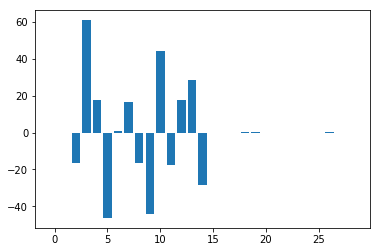

In [18]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

# define the model
print("define the model...")
model = LinearRegression()

# fit the model
print("fit the model...")
model.fit(x_train, y_train)

# get importance
print("get importance...")
importance = model.coef_

# summarize feature importance
for i,v in enumerate(importance):
    print("Feature: {} , Score: {}    - '{}'".format(i,v, x_train.columns[i]))
    
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [19]:
data.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Error_oldbalanceOrg,Error_newbalanceOrig,Error_org_fnlBlnce,diff_org_fnl_balance,Error_oldbalanceDest,Error_newbalanceDest,Error_dest_fnlBlnce,diff_dest_fnl_balance,origEntity_trxCnt_origPos,origEntity_trxCnt_destPos,origEntity_trxCnt,destEntity_trxCnt_destPos,destEntity_trxCnt_origPos,destEntity_trxCnt,PAYMENT,TRANSFER,CASH_OUT,CASH_IN,ext_org_ind_C,ext_den_ind_C,z_outlier,iqr_outlier
step,1.000,0.044,-0.005,-0.005,0.027,0.030,-0.005,0.001,-0.005,-0.005,-0.008,-0.027,0.027,0.030,0.034,0.017,-0.000,0.000,0.000,-0.348,-0.000,-0.348,-0.000,0.002,-0.001,0.001,nan,0.000,-0.010,-0.032
amount,0.044,1.000,-0.007,-0.009,0.364,0.550,0.051,0.003,-0.007,-0.009,-0.062,-0.486,0.364,0.550,0.527,-0.269,0.000,0.000,0.000,0.144,0.005,0.144,-0.183,0.340,-0.004,-0.009,nan,0.183,0.267,0.245
oldbalanceOrg,-0.005,-0.007,1.000,0.999,0.071,0.042,0.006,0.000,1.000,0.999,0.993,0.046,0.071,0.042,0.043,0.001,0.000,-0.000,-0.000,0.142,0.004,0.142,-0.188,-0.082,-0.202,0.507,nan,0.188,0.600,0.426
newbalanceOrig,-0.005,-0.009,0.999,1.000,0.072,0.041,-0.007,0.000,0.999,1.000,0.994,0.050,0.072,0.041,0.043,0.001,0.000,-0.000,-0.000,0.144,0.004,0.144,-0.192,-0.087,-0.212,0.527,nan,0.192,0.597,0.430
oldbalanceDest,0.027,0.364,0.071,0.072,1.000,0.966,-0.006,-0.000,0.071,0.072,0.065,-0.056,1.000,0.966,0.982,-0.081,0.000,-0.000,-0.000,0.415,0.005,0.415,-0.250,0.144,0.093,0.080,nan,0.250,0.473,0.482
newbalanceDest,0.030,0.550,0.042,0.041,0.966,1.000,-0.000,-0.000,0.042,0.041,0.021,-0.185,0.966,1.000,0.991,-0.262,0.000,-0.000,-0.000,0.397,0.005,0.397,-0.250,0.208,0.098,0.032,nan,0.250,0.479,0.464
isFraud,-0.005,0.051,0.006,-0.007,-0.006,-0.000,1.000,0.028,0.006,-0.007,-0.007,0.005,-0.006,-0.000,-0.000,0.001,-0.000,-0.000,-0.000,-0.001,0.000,-0.001,-0.020,0.042,0.009,-0.015,nan,0.020,0.009,0.013
isFlaggedFraud,0.001,0.003,0.000,0.000,-0.000,-0.000,0.028,1.000,0.000,0.000,-0.000,-0.005,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,-0.001,-0.000,-0.001,-0.001,0.003,-0.001,-0.000,nan,0.001,0.000,0.001
Error_oldbalanceOrg,-0.005,-0.007,1.000,0.999,0.071,0.042,0.006,0.000,1.000,0.999,0.993,0.046,0.071,0.042,0.043,0.001,0.000,-0.000,-0.000,0.142,0.004,0.142,-0.188,-0.082,-0.202,0.507,nan,0.188,0.600,0.426
Error_newbalanceOrig,-0.005,-0.009,0.999,1.000,0.072,0.041,-0.007,0.000,0.999,1.000,0.994,0.050,0.072,0.041,0.043,0.001,0.000,-0.000,-0.000,0.144,0.004,0.144,-0.192,-0.087,-0.212,0.527,nan,0.192,0.597,0.430


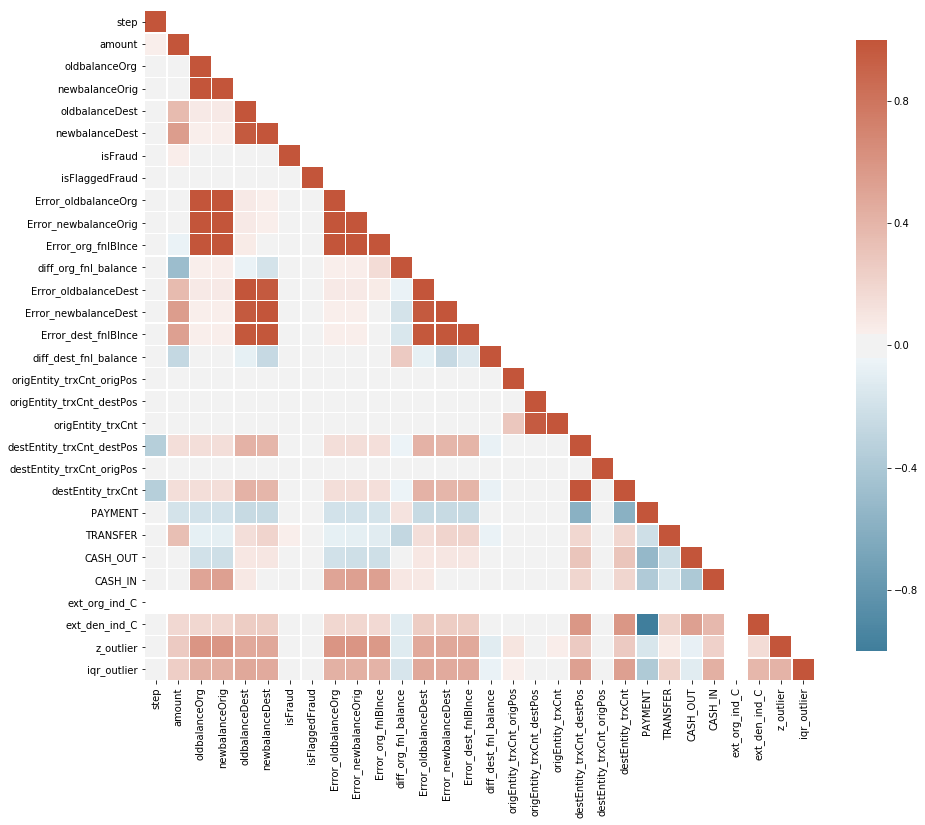

In [23]:
# Define a nice color map for our heatmap
fig, ax = plt.subplots(figsize=(15,15))  

mask = np.triu(np.ones_like(data.corr(), dtype=bool))
np.fill_diagonal(mask, False)

cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(
        data=data.corr(),  # our correlation matrix
        linewidths=0.3,  # the width of lines separating the matrix squares
        square=True,   # enforce 1:1 ratios among correlation cells
        cmap=cmap,  # use the color map we defined above
        vmax=1,  # define the max of our correlation scale
        vmin=-1, # define the min of our correlation scale
        center=0,  # The value at which the color map is centered about (white)
        cbar_kws={"shrink": .75}  # shrink the scale a bit
    , mask=mask
    )
# adjust y-axis ticks for legibility
plt.yticks(rotation=0)  
# show the heatmap
plt.show()

## CART Regression Feature Importance

define the model...
fit the model...
get importance...
Feature: 0 , Score: 0.002097922314623756    - 'step'
Feature: 1 , Score: 0.03977143479795315    - 'amount'
Feature: 2 , Score: 0.02084176422293582    - 'oldbalanceOrg'
Feature: 3 , Score: 0.006097802299068742    - 'newbalanceOrig'
Feature: 4 , Score: 0.009009536300681879    - 'oldbalanceDest'
Feature: 5 , Score: 8.74139773853619e-05    - 'newbalanceDest'
Feature: 6 , Score: 0.0    - 'isFlaggedFraud'
Feature: 7 , Score: 0.006413947212647208    - 'Error_oldbalanceOrg'
Feature: 8 , Score: 0.001430182442698406    - 'Error_newbalanceOrig'
Feature: 9 , Score: 0.3520430560329345    - 'Error_org_fnlBlnce'
Feature: 10 , Score: 0.1921349295890866    - 'diff_org_fnl_balance'
Feature: 11 , Score: 0.0007158421316583337    - 'Error_oldbalanceDest'
Feature: 12 , Score: 0.00042921893286034825    - 'Error_newbalanceDest'
Feature: 13 , Score: 0.3640809205795113    - 'Error_dest_fnlBlnce'
Feature: 14 , Score: 0.0026529350008727367    - 'diff_dest_fnl

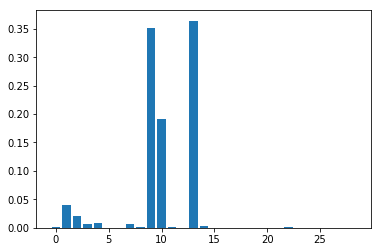

In [25]:
# decision tree for feature importance on a regression problem
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot


# define the model
print("define the model...")
model = DecisionTreeRegressor()

# fit the model

print("fit the model...")
model.fit(x_train, y_train)

# get importance
print("get importance...")
importance = model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print("Feature: {} , Score: {}    - '{}'".format(i,v, x_train.columns[i]))
    
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [27]:
from matplotlib import pyplot

def run_feat_Selection_alg(title,model, x=x_train,y=y_train, importance = model.feature_importances_):
    t0= time.time()
    
    print(title)
                           
    print("define the model...")
    model = model
                           
    print("fit model...")
    model.fit(x, y)
    
    print("get importance...")
    importance = importance
    
    # summarize feature importance
    for i,v in enumerate(importance):
        print("Feature: {} , Score: {}    - '{}'".format(i,v, x.columns[i]))

    # plot feature importance
    pyplot.bar([x for x in range(len(importance))], importance)
    pyplot.show()
    
    print("date: {}   runtime: {}".format(today,str(timedelta(seconds=(time.time()-t0)))))

## CART Classification Feature Importance

CART Classification Feature Importance
define the model...
fit model...
get importance...
Feature: 0 , Score: 0.002097922314623756    - 'step'
Feature: 1 , Score: 0.03977143479795315    - 'amount'
Feature: 2 , Score: 0.02084176422293582    - 'oldbalanceOrg'
Feature: 3 , Score: 0.006097802299068742    - 'newbalanceOrig'
Feature: 4 , Score: 0.009009536300681879    - 'oldbalanceDest'
Feature: 5 , Score: 8.74139773853619e-05    - 'newbalanceDest'
Feature: 6 , Score: 0.0    - 'isFlaggedFraud'
Feature: 7 , Score: 0.006413947212647208    - 'Error_oldbalanceOrg'
Feature: 8 , Score: 0.001430182442698406    - 'Error_newbalanceOrig'
Feature: 9 , Score: 0.3520430560329345    - 'Error_org_fnlBlnce'
Feature: 10 , Score: 0.1921349295890866    - 'diff_org_fnl_balance'
Feature: 11 , Score: 0.0007158421316583337    - 'Error_oldbalanceDest'
Feature: 12 , Score: 0.00042921893286034825    - 'Error_newbalanceDest'
Feature: 13 , Score: 0.3640809205795113    - 'Error_dest_fnlBlnce'
Feature: 14 , Score: 0.0026

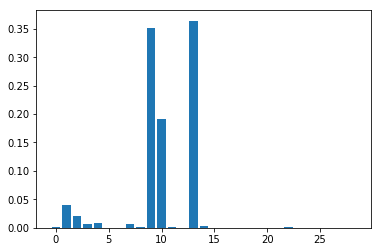

date: 24/01/2022   runtime: 0:02:03.093970


In [28]:
# decision tree for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier

# # define dataset
# X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# # define the model
# model = DecisionTreeClassifier()
# # fit the model
# model.fit(X, y)
# # get importance
# importance = model.feature_importances_
# # summarize feature importance
# for i,v in enumerate(importance):
# 	print('Feature: %0d, Score: %.5f' % (i,v))
# # plot feature importance
# pyplot.bar([x for x in range(len(importance))], importance)
# pyplot.show()


run_feat_Selection_alg(title = 'CART Classification Feature Importance'
                       ,model = DecisionTreeClassifier(), importance = model.feature_importances_)

## Random Forest Regression Feature Importance

Random Forest Regression Feature Importance
define the model...
fit model...
get importance...
Feature: 0 , Score: 0.002097922314623756    - 'step'
Feature: 1 , Score: 0.03977143479795315    - 'amount'
Feature: 2 , Score: 0.02084176422293582    - 'oldbalanceOrg'
Feature: 3 , Score: 0.006097802299068742    - 'newbalanceOrig'
Feature: 4 , Score: 0.009009536300681879    - 'oldbalanceDest'
Feature: 5 , Score: 8.74139773853619e-05    - 'newbalanceDest'
Feature: 6 , Score: 0.0    - 'isFlaggedFraud'
Feature: 7 , Score: 0.006413947212647208    - 'Error_oldbalanceOrg'
Feature: 8 , Score: 0.001430182442698406    - 'Error_newbalanceOrig'
Feature: 9 , Score: 0.3520430560329345    - 'Error_org_fnlBlnce'
Feature: 10 , Score: 0.1921349295890866    - 'diff_org_fnl_balance'
Feature: 11 , Score: 0.0007158421316583337    - 'Error_oldbalanceDest'
Feature: 12 , Score: 0.00042921893286034825    - 'Error_newbalanceDest'
Feature: 13 , Score: 0.3640809205795113    - 'Error_dest_fnlBlnce'
Feature: 14 , Score: 0

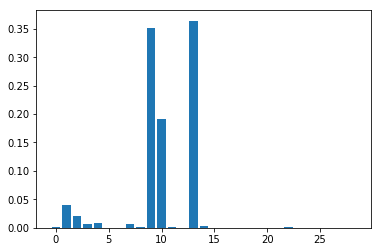

date: 24/01/2022   runtime: 0:09:02.778170


In [29]:
from sklearn.ensemble import RandomForestRegressor

run_feat_Selection_alg(title = 'Random Forest Regression Feature Importance'
                       ,model = RandomForestRegressor(), importance = model.feature_importances_)

## Random Forest Classification Feature Importance

Random Forest CLASSIFICATION Feature Importance
define the model...
fit model...
get importance...
Feature: 0 , Score: 0.002097922314623756    - 'step'
Feature: 1 , Score: 0.03977143479795315    - 'amount'
Feature: 2 , Score: 0.02084176422293582    - 'oldbalanceOrg'
Feature: 3 , Score: 0.006097802299068742    - 'newbalanceOrig'
Feature: 4 , Score: 0.009009536300681879    - 'oldbalanceDest'
Feature: 5 , Score: 8.74139773853619e-05    - 'newbalanceDest'
Feature: 6 , Score: 0.0    - 'isFlaggedFraud'
Feature: 7 , Score: 0.006413947212647208    - 'Error_oldbalanceOrg'
Feature: 8 , Score: 0.001430182442698406    - 'Error_newbalanceOrig'
Feature: 9 , Score: 0.3520430560329345    - 'Error_org_fnlBlnce'
Feature: 10 , Score: 0.1921349295890866    - 'diff_org_fnl_balance'
Feature: 11 , Score: 0.0007158421316583337    - 'Error_oldbalanceDest'
Feature: 12 , Score: 0.00042921893286034825    - 'Error_newbalanceDest'
Feature: 13 , Score: 0.3640809205795113    - 'Error_dest_fnlBlnce'
Feature: 14 , Scor

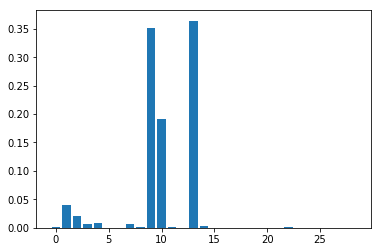

date: 24/01/2022   runtime: 0:02:04.624354


In [30]:
from sklearn.ensemble import RandomForestClassifier

run_feat_Selection_alg(title = 'Random Forest CLASSIFICATION Feature Importance'
                       ,model = RandomForestClassifier(), importance = model.feature_importances_)

## XGBoost Feature Importance

In [38]:
!pip install cmake
!pip install xgboost


# check xgboost version
import xgboost
print(xgboost.__version__)

    100% |████████████████████████████████| 21.3MB 1.9MB/s eta 0:00:01   35% |███████████▏                    | 7.5MB 27.7MB/s eta 0:00:01    59% |███████████████████             | 12.7MB 26.6MB/s eta 0:00:01    71% |██████████████████████▉         | 15.2MB 24.7MB/s eta 0:00:01    83% |██████████████████████████▊     | 17.8MB 26.6MB/s eta 0:00:01    96% |██████████████████████████████▉ | 20.5MB 26.4MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/c4/04/32989ec64004dca894f1d3ea4c41b1397272857edf14c1a9d1492b692d2d/xgboost-1.5.2.tar.gz
  Running setup.py bdist_wheel for xgboost ... done
  Stored in directory: /root/.cache/pip/wheels/a7/60/20/78ce4cd566925a273c5ac65e5562ae91fc7555d82b1814b83b
Successfully built xgboost
1.5.2


In [36]:
import pip
pip.main(['install', 'xgboost'])

AttributeError: module 'pip' has no attribute 'main'

In [39]:
import xgboost
print(xgboost.__version__)

1.5.2


In [ ]:
### XGBoost Regression Feature Importance

In [ ]:
from xgboost import XGBRegressor

run_feat_Selection_alg(title = 'XGBoost Regression Feature Importance'
                       ,model = XGBRegressor(), importance = model.feature_importances_)

In [ ]:
### XGBoost Classification Feature Importance

XGBoost Classification Feature Importance
define the model...
fit model...


/opt/conda/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:28:34] WARNING: /tmp/pip-install-2ssc_0fy/xgboost/build/temp.linux-x86_64-3.6/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
get importance...
Feature: 0 , Score: 0.002097922314623756    - 'step'
Feature: 1 , Score: 0.03977143479795315    - 'amount'
Feature: 2 , Score: 0.02084176422293582    - 'oldbalanceOrg'
Feature: 3 , Score: 0.006097802299068742    - 'newbalanceOrig'
Feature: 4 , Score: 0.009009536300681879    - 'oldbalanceDest'
Feature: 5 , Score: 8.74139773853619e-05    - 'newbalanceDest'
Feature: 6 , Score: 0.0    - 'isFlaggedFraud'
Feature: 7 , Score: 0.006413947212647208    - 'Error_oldbalanceOrg'
Feature: 8 , Score: 0.001430182442698406    - 'Error_newbalanceOrig'
Feature: 9 , Score: 0.3520430560329345    - 'Error_org_fnlBlnce'
Feature: 10 , Score: 0.1921349295890866    - 'diff_org_fnl

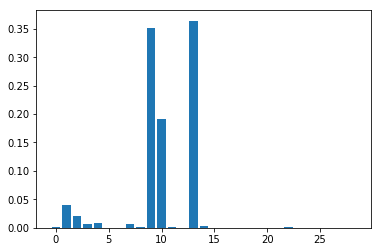

date: 24/01/2022   runtime: 0:23:55.032980


In [40]:
from xgboost import XGBClassifier

run_feat_Selection_alg(title = 'XGBoost Classification Feature Importance'
                       ,model = XGBClassifier(), importance = model.feature_importances_)

In [47]:
from sklearn.metrics import average_precision_score
from xgboost.sklearn import XGBClassifier
from xgboost import plot_importance, to_graphviz

In [44]:
weights = (y == 0).sum() / (1.0 * (y == 1).sum())
clf = XGBClassifier(max_depth = 3, scale_pos_weight = weights, \
                n_jobs = 4)
probabilities = clf.fit(x_train, y_train).predict_proba(x_test)
print('AUPRC = {}'.format(average_precision_score(y_test, \
                                              probabilities[:, 1])))

AUPRC = 0.9981051483173861


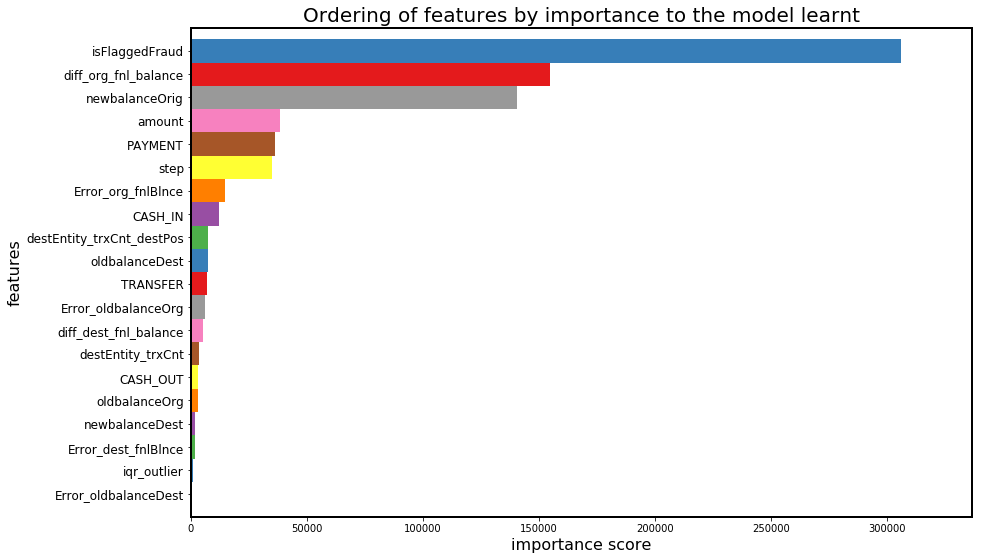

In [45]:
fig = plt.figure(figsize = (14, 9))
ax = fig.add_subplot(111)

colours = plt.cm.Set1(np.linspace(0, 1, 9))

ax = plot_importance(clf, height = 1, color = colours, grid = False, \
                     show_values = False, importance_type = 'cover', ax = ax);
for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(2)
        
ax.set_xlabel('importance score', size = 16);
ax.set_ylabel('features', size = 16);
ax.set_yticklabels(ax.get_yticklabels(), size = 12);
ax.set_title('Ordering of features by importance to the model learnt', size = 20);

In [49]:
!pip install graphviz

    100% |████████████████████████████████| 51kB 4.4MB/s ta 0:00:011


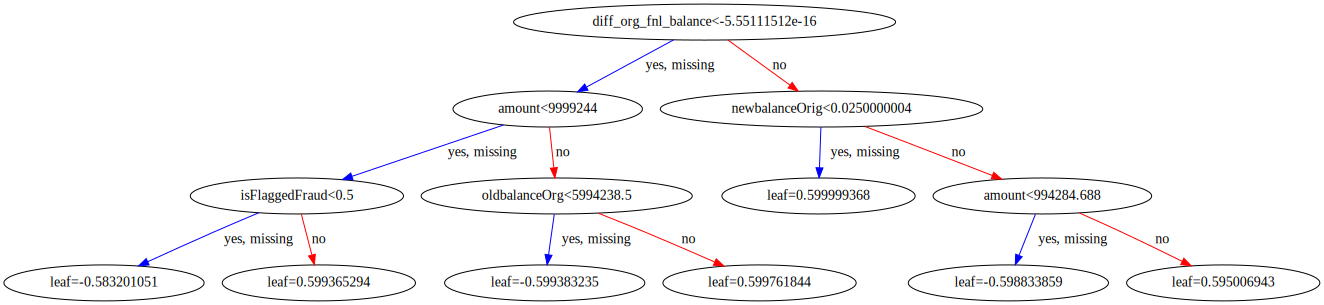

In [50]:
to_graphviz(clf)

In [ ]:
trainSizes, trainScores, crossValScores = learning_curve(\
XGBClassifier(max_depth = 3, scale_pos_weight = weights, n_jobs = 4), x_train,\
                                         y_train, scoring = 'average_precision')

/opt/conda/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:12:12] WARNING: /tmp/pip-install-2ssc_0fy/xgboost/build/temp.linux-x86_64-3.6/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:12:51] WARNING: /tmp/pip-install-2ssc_0fy/xgboost/build/temp.linux-x86_64-3.6/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:15:20] WARNING: /tmp/pip-install-2ssc_0fy/xgboost/build/temp.linux-x86_64-3.6/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:27:20] WARNING: /tmp/pip-install-2ssc_0fy/xgboost/build/temp.linux-x86_64-3.6/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:36:34] WARNING: /tmp/pip-install-2ssc_0fy/xgboost/build/temp.linux-x86_64-3.6/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:37:14] WARNING: /tmp/pip-install-2ssc_0fy/xgboost/build/temp.linux-x86_64-3.6/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:39:41] WARNING: /tmp/pip-install-2ssc_0fy/xgboost/build/temp.linux-x86_64-3.6/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:44:26] WARNING: /tmp/pip-install-2ssc_0fy/xgboost/build/temp.linux-x86_64-3.6/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:51:35] WARNING: /tmp/pip-install-2ssc_0fy/xgboost/build/temp.linux-x86_64-3.6/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:
trainScoresMean = np.mean(trainScores, axis=1)
trainScoresStd = np.std(trainScores, axis=1)
crossValScoresMean = np.mean(crossValScores, axis=1)
crossValScoresStd = np.std(crossValScores, axis=1)

colours = plt.cm.tab10(np.linspace(0, 1, 9))

fig = plt.figure(figsize = (14, 9))
plt.fill_between(trainSizes, trainScoresMean - trainScoresStd,
    trainScoresMean + trainScoresStd, alpha=0.1, color=colours[0])
plt.fill_between(trainSizes, crossValScoresMean - crossValScoresStd,
    crossValScoresMean + crossValScoresStd, alpha=0.1, color=colours[1])
plt.plot(trainSizes, trainScores.mean(axis = 1), 'o-', label = 'train', \
         color = colours[0])
plt.plot(trainSizes, crossValScores.mean(axis = 1), 'o-', label = 'cross-val', \
         color = colours[1])

ax = plt.gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, ['train', 'cross-val'], bbox_to_anchor=(0.8, 0.15), \
               loc=2, borderaxespad=0, fontsize = 16);
plt.xlabel('training set size', size = 16); 
plt.ylabel('AUPRC', size = 16)
plt.title('Learning curves indicate slightly underfit model', size = 20)